In [1]:
! pwd

/Users/tjarkmiener/Desktop/ctlearn_workshop/ctlearn_workshop2024/notebooks


In [2]:
! conda list | grep ctapipe
! conda list | grep ctlearn
! conda list | grep dl1-data-handler 
! conda list | grep tensorflow

ctapipe                   0.20.0                   pypi_0    pypi
# packages in environment at /opt/anaconda3/envs/ctlearn:
ctlearn                   0.7.0.post46              dev_0    <develop>
dl1-data-handler          0.10.11.post35            dev_0    <develop>
tensorflow                2.15.1                   pypi_0    pypi
tensorflow-estimator      2.15.0                   pypi_0    pypi
tensorflow-io-gcs-filesystem 0.37.0                   pypi_0    pypi


In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics

In [4]:
! mkdir ../data/DL2
! mkdir ../data/DL2/runwise_files
! mkdir ../data/R1DL1_merged/test
! mkdir ../data/R1DL1_merged/test/gamma-diffuse
! mkdir ../data/R1DL1_merged/test/proton/
! cp ../data/R1DL1_merged/gamma_theta_16.087_az_108.090_runs3-4.r1.dl1.h5 ../data/R1DL1_merged/test/gamma-diffuse/
! cp ../data/R1DL1_merged/proton_theta_16.087_az_108.090_runs3-4.r1.dl1.h5 ../data/R1DL1_merged/test/proton/
! cp ../data/R1DL1_merged/proton_theta_16.087_az_108.090_runs4-6.r1.dl1.h5 ../data/R1DL1_merged/test/proton/

mkdir: ../data/DL2: File exists
mkdir: ../data/DL2/runwise_files: File exists
mkdir: ../data/R1DL1_merged/test: File exists
mkdir: ../data/R1DL1_merged/test/gamma-diffuse: File exists
mkdir: ../data/R1DL1_merged/test/proton/: File exists
cp: ../data/R1DL1_merged/proton_theta_16.087_az_108.090_runs4-6.r1.dl1.h5: No such file or directory


In [5]:
# Predicting all files in one directory or list of absolute paths in txt
# Sims
! ctlearn --config ../configs/TRN_predicting.yml \
--tel_types LST_LST_LSTCam \
--reco type \
--output ../logs/LST1_cleanedTRN_type/ \
--mode predict \
--clean

! ctlearn --config ../configs/TRN_predicting.yml \
--tel_types LST_LST_LSTCam \
--reco energy \
--output ../logs/LST1_cleanedTRN_energy/ \
--mode predict \
--clean

! ctlearn --config ../configs/TRN_predicting.yml \
--tel_types LST_LST_LSTCam \
--reco direction \
--output ../logs/LST1_cleanedTRN_direction/ \
--mode predict \
--clean

INFO:Logging has been correctly set up
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:Number of devices: 1
INFO:Loading data:
INFO:  For a large dataset, this may take a while...
INFO:  Number of events loaded: 5974
INFO:  Simulation info for pyirf.simulations.SimulatedEventsInfo: {'n_showers': 400000.0, 'energy_range_min': 0.006, 'energy_range_max': 55.251, 'max_scatter_range': 918.2, 'spectral_index': -2.0, 'min_viewcone_radius': 0.0, 'max_viewcone_radius': 2.5, 'min_alt': 1.2900252, 'max_alt': 1.2900252}
INFO:Setting up model:
INFO:  Constructing model from config.
INFO:  Loading weights from '../logs/LST1_cleanedTRN_type//ctlearn_model/'.
INFO:  Model has been correctly set up from config.
INFO:  Compiling model.
INFO:Predicting...
2024-05-29 16:51:58.496851: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Da

INFO:  Model has been correctly set up from config.
INFO:  Compiling model.
INFO:Predicting...
/opt/anaconda3/envs/ctlearn/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['parameters'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
27/27 [==============================] - 100s 4s/step
2024-05-29 17:06:55.553053: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
1/1 [==============================] - 2s 2s/step
Closing remaining open files:../logs/LST1_cleanedTRN_energy//example_identifiers_file.h5...done/Users/tjarkmiener/Desktop/ctlearn_workshop/ctlearn_workshop2024/data/R1DL1_merged/test/proton/proton_theta_16.087_az_108.090_runs3-4.r1.dl1.h5...done../logs/LST1_cleanedTRN_energy//example_identifiers

In [6]:
# Predicting per file
# Real data
! ctlearn -d TRN \
--input ../data/R1DL1_merged/ \
--pattern "gamma_*_runs3-4*" "proton_*_runs3-4*" "proton_*_runs5-6*" \
--tel_types LST_LST_LSTCam \
--reco type \
--output ../logs/LST1_cleanedTRN_type/ \
--prediction_directory ../data/DL2/runwise_files/ \
--mode predict \
--clean

! ctlearn -d TRN \
--input ../data/R1DL1_merged/ \
--pattern "gamma_*_runs3-4*" "proton_*_runs3-4*" "proton_*_runs5-6*" \
--tel_types LST_LST_LSTCam \
--reco energy \
--output ../logs/LST1_cleanedTRN_energy/ \
--prediction_directory ../data/DL2/runwise_files/ \
--mode predict \
--clean

! ctlearn -d TRN \
--input ../data/R1DL1_merged/ \
--pattern "gamma_*_runs3-4*" "proton_*_runs3-4*" "proton_*_runs5-6*" \
--tel_types LST_LST_LSTCam \
--reco direction \
--output ../logs/LST1_cleanedTRN_direction/ \
--prediction_directory ../data/DL2/runwise_files/ \
--mode predict \
--clean

INFO:Logging has been correctly set up
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:Number of devices: 1
INFO:Loading data:
INFO:  For a large dataset, this may take a while...
INFO:  Number of events loaded: 5974
INFO:  Simulation info for pyirf.simulations.SimulatedEventsInfo: {'n_showers': 400000.0, 'energy_range_min': 0.006, 'energy_range_max': 55.251, 'max_scatter_range': 918.2, 'spectral_index': -2.0, 'min_viewcone_radius': 0.0, 'max_viewcone_radius': 2.5, 'min_alt': 1.2900252, 'max_alt': 1.2900252}
INFO:Setting up model:
INFO:  Constructing model from config.
INFO:  Loading weights from '../logs/LST1_cleanedTRN_type//ctlearn_model/'.
INFO:  Model has been correctly set up from config.
INFO:  Compiling model.
INFO:Predicting...
2024-05-29 17:14:27.753711: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Da

INFO:  Model has been correctly set up from config.
INFO:  Compiling model.
INFO:Predicting...
2024-05-29 17:21:16.498567: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
/opt/anaconda3/envs/ctlearn/lib/python3.10/site-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['parameters'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
93/93 [==============================] - 325s 3s/step
2024-05-29 17:26:41.151169: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
1/1 [==============================] - 1s 1s/step
INFO:Logging has been correctly set up
INFO:tensorflow:Using Mi

93/93 [==============================] - 326s 3s/step
2024-05-29 17:33:47.626609: W tensorflow/core/framework/dataset.cc:959] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
1/1 [==============================] - 1s 1s/step
INFO:Logging has been correctly set up
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:Number of devices: 1
INFO:Loading data:
INFO:  For a large dataset, this may take a while...
INFO:  Number of events loaded: 672
INFO:  Simulation info for pyirf.simulations.SimulatedEventsInfo: {'n_showers': 1200000.0, 'energy_range_min': 0.011, 'energy_range_max': 110.502, 'max_scatter_range': 1530.3, 'spectral_index': -2.0, 'min_viewcone_radius': 0.0, 'max_viewcone_radius': 7.842, 'min_alt': 1.2900252, 'max_alt': 1.2900

In [7]:
#! vitables

[]

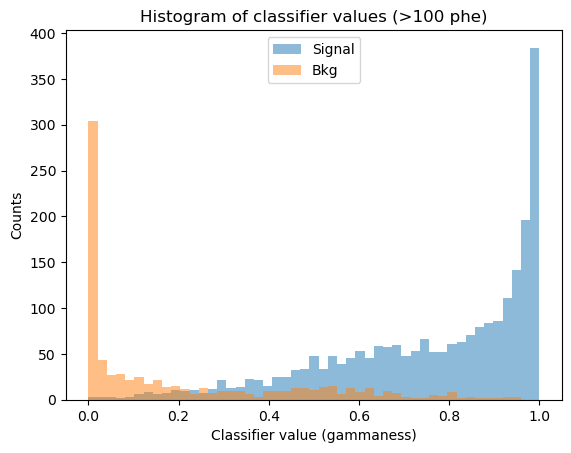

In [8]:
# Define signal and background file
column_name = "gammaness"
gamma_file = "../data/DL2/my_first_predictions_gamma-diffuse.h5"
proton_file = "../data/DL2/my_first_predictions_proton.h5"
size_cut = 100
tel_type = "LST_LST_LSTCam"

# Read data
with pd.HDFStore(gamma_file, mode="r") as f:
    events_dl2 = f["/dl2/reco"]
    events_dl1b = f[f"/dl1b/{tel_type}/tel_1"]
    hillas_intensity = events_dl1b["hillas_intensity"]
    signal_classifier_values = events_dl2[column_name][hillas_intensity > size_cut]
with pd.HDFStore(proton_file, mode="r") as f:
    events_dl2 = f["/dl2/reco"]    
    events_dl1b = f[f"/dl1b/{tel_type}/tel_1"]
    hillas_intensity = events_dl1b["hillas_intensity"]
    background_classifier_values = events_dl2[column_name][hillas_intensity > size_cut]


# Make the plot
plt.figure()
bins = np.linspace(0, 1, 50)

# Plot the histograms for both classifier values
plt.hist(signal_classifier_values, bins, alpha=0.5, label='Signal')
plt.hist(background_classifier_values, bins, alpha=0.5, label='Bkg')

# Finish the plot
plt.xlabel(f'Classifier value ({column_name})')
plt.ylabel('Counts')
plt.title(f'Histogram of classifier values (>{size_cut} phe)')

plt.legend(loc='upper center')

# Show plot
plt.plot()

[]

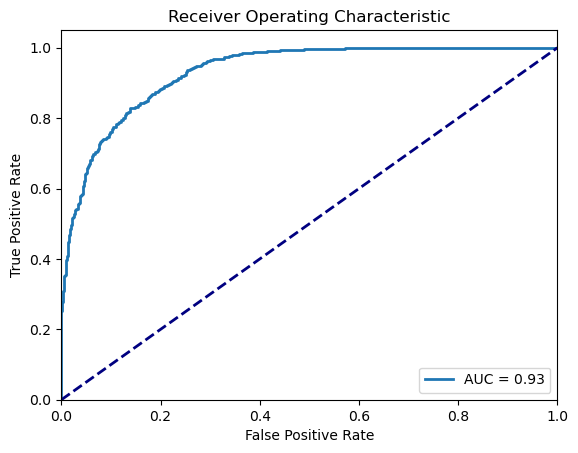

In [9]:
# Define signal and background file
column_name = "gammaness"
gamma_file = "../data/DL2/my_first_predictions_gamma-diffuse.h5"
proton_file = "../data/DL2/my_first_predictions_proton.h5"
size_cut = 100
tel_type = "LST_LST_LSTCam"

# Read data
with pd.HDFStore(gamma_file, mode="r") as f:
    events_dl2 = f["/dl2/reco"]
    events_dl1b = f[f"/dl1b/{tel_type}/tel_1"]
    hillas_intensity = events_dl1b["hillas_intensity"]
    signal_classifier_values = events_dl2[column_name][hillas_intensity > size_cut]
    signal_true_values = np.ones(len(signal_classifier_values))
with pd.HDFStore(proton_file, mode="r") as f:
    events_dl2 = f["/dl2/reco"]
    events_dl1b = f[f"/dl1b/{tel_type}/tel_1"]
    hillas_intensity = events_dl1b["hillas_intensity"]
    background_classifier_values = events_dl2[column_name][hillas_intensity > size_cut]
    background_true_values = np.zeros(len(background_classifier_values))

# Make the plot
plt.figure()

# Plot the ROC curve
classifier_values = np.concatenate((signal_classifier_values, background_classifier_values))
true_values = np.concatenate((signal_true_values, background_true_values))

fpr, tpr, thresholds = sklearn.metrics.roc_curve(true_values, classifier_values)
auc = sklearn.metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='AUC = {:.2f}'.format(auc))

# Finish the plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Show plot
plt.plot()

In [10]:
# here AUC per true_energy (ask bastien for code)

In [11]:
# here energy res (ask bastien for code)

In [12]:
# here angular res (ask bastien for code)